In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
wind = pd.read_csv('./data.csv',index_col='Time Stamp')
windspeed_data = wind.drop(['Standard Deviation', 'Average Direction'],axis=1)

In [34]:
wind


,Average Speed,Standard Deviation,Average Direction
Time Stamp,,,
2006-12-03 21:50:00,15.8,2.14,113
2006-12-03 22:00:00,17.1,2.99,113
2006-12-03 22:10:00,18.2,2.62,135
2006-12-03 22:20:00,19.2,3.21,135
2006-12-03 22:30:00,23.5,3.15,135
2006-12-03 22:40:00,22.3,3.32,135
2006-12-03 22:50:00,23.9,3.37,135
2006-12-03 23:00:00,25.4,3.42,135
2006-12-03 23:10:00,27.0,3.21,135


In [4]:
windspeed_data.head()

,Average Speed
Time Stamp,
12/3/2006 21:50,15.8
12/3/2006 22:00,17.1
12/3/2006 22:10,18.2
12/3/2006 22:20,19.2
12/3/2006 22:30,23.5


In [5]:
wind.index = pd.to_datetime(wind.index)

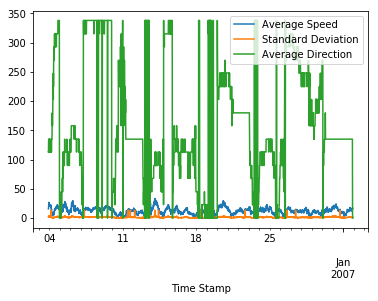

In [6]:
wind.plot()

In [7]:
windspeed_data.index = pd.to_datetime(windspeed_data.index)


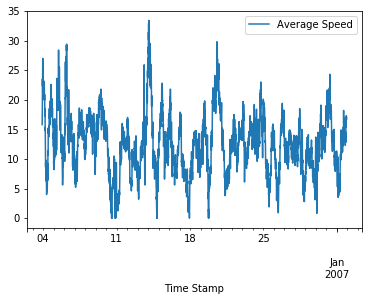

In [8]:
windspeed_data.plot()

In [9]:
windspeed_data_mod = windspeed_data.apply(np.log)

In [10]:
windspeed_data_mod.head()

,Average Speed
Time Stamp,
2006-12-03 21:50:00,2.760010
2006-12-03 22:00:00,2.839078
2006-12-03 22:10:00,2.901422
2006-12-03 22:20:00,2.954910
2006-12-03 22:30:00,3.157000


In [11]:
windspeed_data_mod.index = pd.to_datetime(windspeed_data_mod.index)


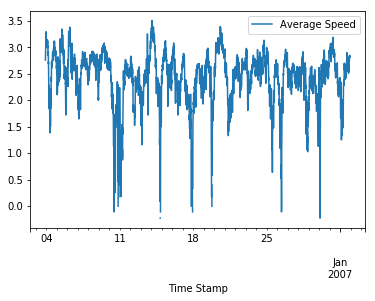

In [12]:
windspeed_data_mod.plot()

In [13]:
windspeed_data.describe()

,Average Speed
count,4178.000000
mean,12.565606
std,5.052430
min,0.000000
25%,9.300000
50%,12.500000
75%,15.500000
max,33.400000


In [14]:
windspeed_data_mod.describe()

,Average Speed
count,4178.000000
mean,-inf
std,NaN
min,-inf
25%,2.230014
50%,2.525729
75%,2.740840
max,3.508556


In [15]:
train_data = windspeed_data.head(2500)
test_data = windspeed_data.tail(1678)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
#train_scaled = train_data
test_scaled = scaler.transform(test_data)
#test_scaled = test_data

In [17]:
def next_batch(training_data,batch_size,steps):
    rand_start = np.random.randint(0,len(training_data)-steps)
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)
    return y_batch[:,:-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1) 

In [18]:
#Hyperparameters
num_inputs = 1
num_time_steps = 12
num_neurons = 256
num_outputs = 1
learning_rate = 0.3 
num_train_iterations = 20000;batch_size = 1

In [19]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [20]:
num_layers = 4
lstm = tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons,activation=tf.nn.relu)
cell = tf.contrib.rnn.OutputProjectionWrapper(lstm,
    output_size=num_outputs)
print(cell)


Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').


In [21]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [22]:
loss = 20*tf.reduce_mean(tf.losses.absolute_difference(outputs,y)) # MAE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [23]:
init = tf.global_variables_initializer()

In [24]:
saver = tf.train.Saver()

In [25]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

In [26]:
avg_mae = []
with tf.Session() as sess:#config=tf.ConfigProto(gpu_options=gpu_options)
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mae = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMAPE:", mae*5,"%")
            avg_mae.append(mae)
        
    print("Mean MAPE: {}%".format((500*sum(avg_mae))/num_train_iterations))    
    print("--Training Complete--")
    saver.save(sess, "./ex_time_series_model")

0 	MAPE: 3.879593707359437e+17 %
100 	MAPE: 58525070.0 %
200 	MAPE: 35803048960.0 %
300 	MAPE: 26023.3154296875 %
400 	MAPE: 7502.359619140625 %
500 	MAPE: 5467.79052734375 %
600 	MAPE: 6027.6416015625 %
700 	MAPE: 5524.366455078125 %
800 	MAPE: 5624.847412109375 %
900 	MAPE: 4946.7877197265625 %
1000 	MAPE: 5339.915771484375 %
1100 	MAPE: 5092.186279296875 %
1200 	MAPE: 4958.381652832031 %
1300 	MAPE: 4453.2366943359375 %
1400 	MAPE: 4825.61767578125 %
1500 	MAPE: 6148.3929443359375 %
1600 	MAPE: 5234.96826171875 %
1700 	MAPE: 3904.4674682617188 %
1800 	MAPE: 4215.465087890625 %
1900 	MAPE: 4721.5350341796875 %
2000 	MAPE: 5193.724365234375 %
2100 	MAPE: 4491.7144775390625 %
2200 	MAPE: 4028.941650390625 %
2300 	MAPE: 4298.9910888671875 %
2400 	MAPE: 4393.423156738281 %
2500 	MAPE: 4174.560546875 %
2600 	MAPE: 4481.026916503906 %
2700 	MAPE: 3376.497802734375 %
2800 	MAPE: 4214.779968261719 %
2900 	MAPE: 3638.4429931640625 %
3000 	MAPE: 3135.4049682617188 %
3100 	MAPE: 4140.1809692382

In [27]:
with tf.Session() as sess:
    
    # Use your Saver instance to restore your saved rnn time series model
    saver.restore(sess, "./ex_time_series_model")

    # Create a numpy array for your genreative seed from the last 12 months of the 
    # training set data. Hint: Just use tail(12) and then pass it to an np.array
    train_seed = list(train_scaled[-len(test_data):])
    
    ## Now create a for loop that 
    for iteration in range(len(test_data)):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./ex_time_series_model


In [28]:
train_seed

[array([0.5508982]),
 array([0.5508982]),
 array([0.57185629]),
 array([0.55988024]),
 array([0.5508982]),
 array([0.51497006]),
 array([0.50598802]),
 array([0.55389222]),
 array([0.5239521]),
 array([0.5239521]),
 array([0.55389222]),
 array([0.54191617]),
 array([0.5508982]),
 array([0.56586826]),
 array([0.49101796]),
 array([0.46706587]),
 array([0.47904192]),
 array([0.47305389]),
 array([0.47305389]),
 array([0.54790419]),
 array([0.51497006]),
 array([0.49700599]),
 array([0.54491018]),
 array([0.51497006]),
 array([0.47005988]),
 array([0.40718563]),
 array([0.43712575]),
 array([0.47305389]),
 array([0.42814371]),
 array([0.43113772]),
 array([0.42814371]),
 array([0.39820359]),
 array([0.39820359]),
 array([0.42215569]),
 array([0.46107784]),
 array([0.46107784]),
 array([0.47904192]),
 array([0.43413174]),
 array([0.43712575]),
 array([0.47904192]),
 array([0.49101796]),
 array([0.4491018]),
 array([0.45808383]),
 array([0.41916168]),
 array([0.44610778]),
 array([0.4640718

In [29]:
results = scaler.inverse_transform(np.array(train_seed[len(test_data):]).reshape(len(test_data),1))
#results = np.array(train_seed[len(test_data):]).reshape(len(test_data),1)

/home/justbj/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:405: RuntimeWarning: overflow encountered in true_divide
  X /= self.scale_


In [30]:
len(results)

1678

In [31]:
test_data['Generated'] = results

/home/justbj/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
test_data

,Average Speed,Generated
Time Stamp,,
2006-12-21 06:30:00,8.6,-7.101476e+01
2006-12-21 06:40:00,8.4,-1.154499e+02
2006-12-21 06:50:00,6.8,1.850365e+02
2006-12-21 07:00:00,7.6,1.885258e+02
2006-12-21 07:10:00,7.6,1.861705e+02
2006-12-21 07:20:00,7.6,1.505477e+02
2006-12-21 07:30:00,7.5,1.529575e+02
2006-12-21 07:40:00,6.2,1.289564e+02
2006-12-21 07:50:00,5.3,9.431336e+01


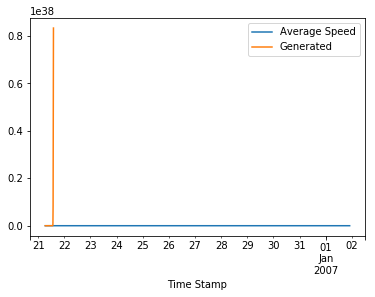

In [33]:
test_data.plot()